In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

/home/queimadas/.conda/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('conhecimento.csv')

## Descrição dos dados

Mostrando informações sobre o conjunto de verifica 1(QUEIMADA) e verifica 3(NAO_QUEIMADA)

In [3]:
df1 = df[df.verifica==1] # queimada
df3 = df[df.verifica==3] # nao queimada

ids_3 = np.random.choice(df3.id, len(df1), replace=False)
df3_amostra = df[df.id.isin(ids_3)].copy().reset_index(drop=True)

In [4]:
print('QUEIMADA')
df1.describe()

QUEIMADA


ndvi           nbrl       dif_ndvi      dif_dnbrl  \
count  113184.000000  113184.000000  113184.000000  113184.000000   
mean        0.226356       0.011152       0.173211       0.248001   
std         0.059957       0.079079       0.094378       0.119682   
min        -0.507201      -0.753977      -0.065708       0.000000   
25%         0.185310      -0.039758       0.106120       0.160890   
50%         0.224413       0.009293       0.155019       0.221400   
75%         0.266749       0.061435       0.215183       0.296315   
max         0.542561       0.431150       0.787095       1.205911   

            medianb2       medianb3       medianb4       medianb5  \
count  113184.000000  113184.000000  113184.000000  113184.000000   
mean        0.109385       0.099383       0.117826       0.188681   
std         0.017468       0.022776       0.032972       0.048024   
min         0.066379       0.045448       0.032622       0.016253   
25%         0.098669       0.084960       0.096125       0.158214   
50%         0.106015       0.096094       0.114774       0.188654   
75%         0.116183       0.109124       0.135411       0.217144   
max         0.784851       0.743309       0.792964       0.921527   

            medianb6       medianb7            id  verifica  
count  113184.000000  113184.000000  1.131840e+05  113184.0  
mean        0.621125       0.185466  4.416280e+06       1.0  
std         3.434797       0.056094  2.280954e+06       0.0  
min         0.005842       0.008838  2.101400e+04       1.0  
25%         0.192681       0.148901  2.373944e+06       1.0  
50%         0.233781       0.183199  4.384632e+06       1.0  
75%         0.274958       0.218364  6.991396e+06       1.0  
max        38.582066       1.536971  7.564726e+06       1.0

In [5]:
print('NAO_QUEIMADA')
df3.describe()

NAO_QUEIMADA


ndvi           nbrl       dif_ndvi      dif_dnbrl  \
count  275367.000000  275367.000000  275367.000000  275367.000000   
mean        0.314787       0.174871       0.233534       0.290336   
std         0.086081       0.095718       0.096030       0.110302   
min        -0.621544      -0.749672      -0.126101      -0.005284   
25%         0.254206       0.110873       0.157720       0.204120   
50%         0.310063       0.170081       0.223624       0.280369   
75%         0.376879       0.237938       0.299479       0.359452   
max         0.639127       0.582693       0.756723       0.922058   

            medianb2       medianb3       medianb4       medianb5  \
count  275367.000000  275367.000000  275367.000000  275367.000000   
mean        0.145918       0.143685       0.156234       0.294951   
std         0.041950       0.045670       0.050521       0.065975   
min         0.068000       0.044790       0.030617       0.014229   
25%         0.110990       0.107108       0.118811       0.249108   
50%         0.138607       0.138634       0.150966       0.290510   
75%         0.173645       0.172470       0.184431       0.338610   
max         0.768113       0.748524       0.777741       0.844699   

            medianb6       medianb7            id  verifica  
count  275367.000000  275367.000000  2.753670e+05  275367.0  
mean        0.424857       0.209078  3.601712e+06       3.0  
std         1.540715       0.058452  1.940034e+06       0.0  
min        -3.488903       0.004941  1.752800e+04       3.0  
25%         0.256897       0.168728  2.196236e+06       3.0  
50%         0.296199       0.201991  3.455528e+06       3.0  
75%         0.346243       0.243720  4.731056e+06       3.0  
max        32.051437       1.188263  7.569192e+06       3.0

In [6]:
print('AMOSTRA')
df3_amostra.describe()

AMOSTRA


ndvi           nbrl       dif_ndvi      dif_dnbrl  \
count  113184.000000  113184.000000  113184.000000  113184.000000   
mean        0.315025       0.174839       0.233236       0.290266   
std         0.086066       0.095731       0.096008       0.110464   
min        -0.492093      -0.376596       0.000000       0.000000   
25%         0.254270       0.110783       0.157122       0.203808   
50%         0.310188       0.170035       0.223457       0.280096   
75%         0.376944       0.237846       0.299265       0.359646   
max         0.629130       0.574695       0.756723       0.862622   

            medianb2       medianb3       medianb4       medianb5  \
count  113184.000000  113184.000000  113184.000000  113184.000000   
mean        0.145839       0.143610       0.156146       0.294903   
std         0.041865       0.045627       0.050460       0.065925   
min         0.068000       0.046179       0.030810       0.014229   
25%         0.110887       0.107001       0.118666       0.249185   
50%         0.138459       0.138420       0.150889       0.290480   
75%         0.173598       0.172350       0.184358       0.338722   
max         0.759307       0.746034       0.775045       0.833556   

            medianb6       medianb7            id  verifica  
count  113184.000000  113184.000000  1.131840e+05  113184.0  
mean        0.424395       0.209036  3.603782e+06       3.0  
std         1.530693       0.058314  1.940972e+06       0.0  
min        -3.488903       0.004941  1.767000e+04       3.0  
25%         0.257039       0.168691  2.196818e+06       3.0  
50%         0.296365       0.201994  3.455628e+06       3.0  
75%         0.346392       0.243553  4.730813e+06       3.0  
max        30.420074       0.601721  7.569189e+06       3.0

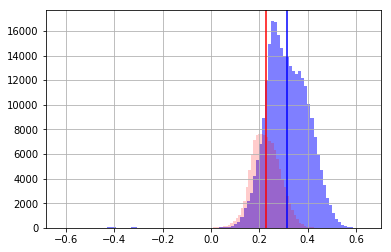

In [7]:
df3.ndvi.hist(bins=100, facecolor='b', alpha=0.5)
ax = df1.ndvi.hist(bins=100, facecolor='r', alpha=0.2)
ax.axvline(df1.ndvi.mean(), c='r')
ax.axvline(df3.ndvi.mean(), c='b')

In [8]:
id_cenas = sorted(df[df.id_cena.str.contains('221067201')].id_cena.unique())

/home/queimadas/.conda/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


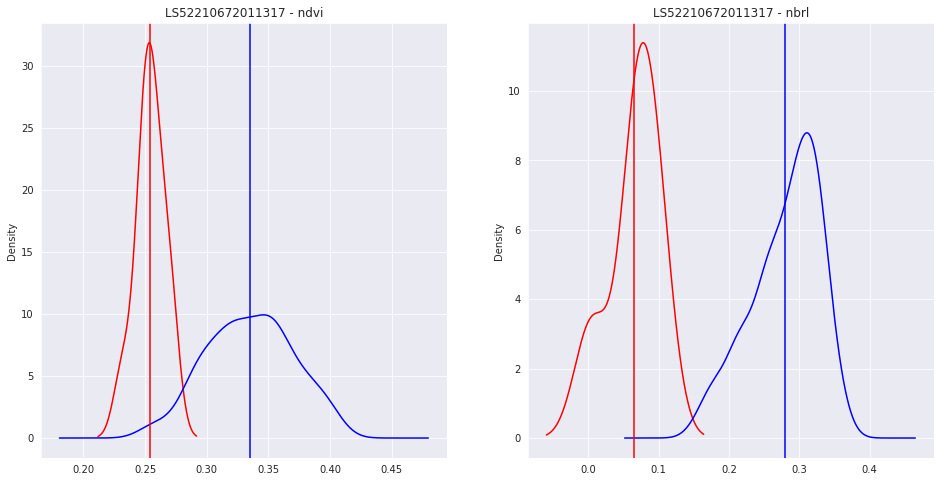

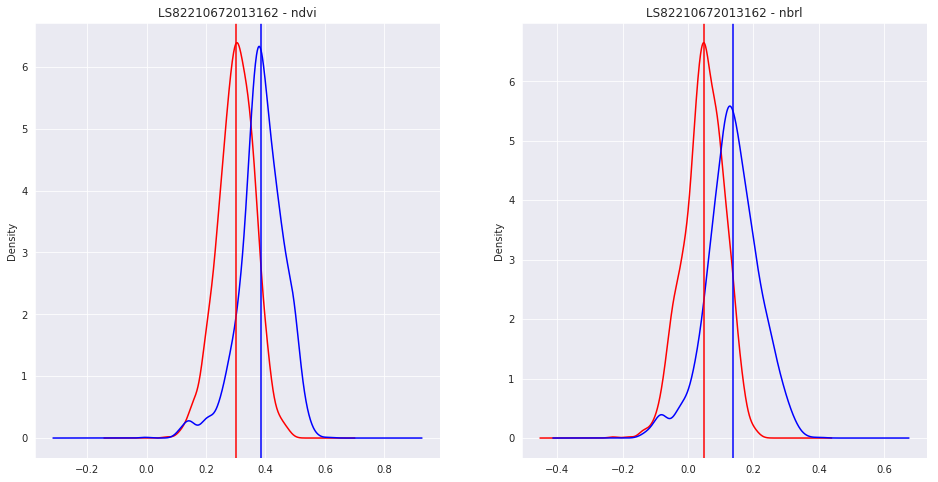

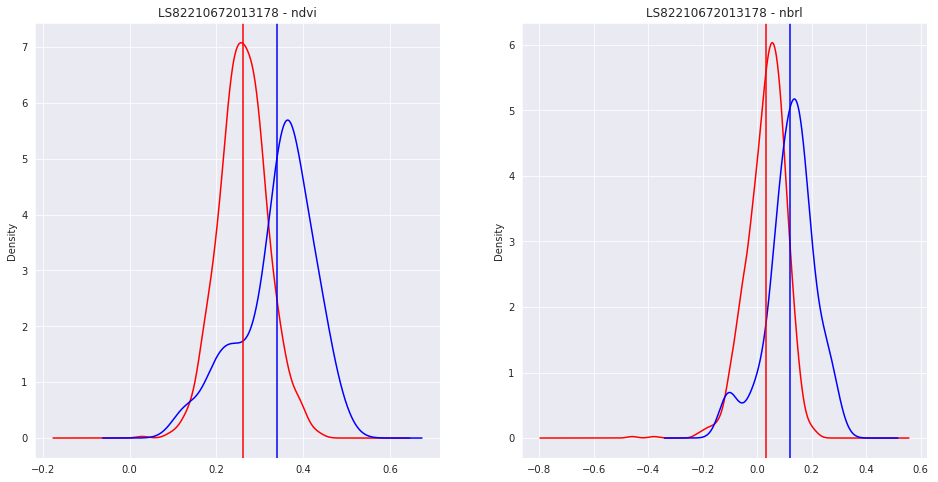

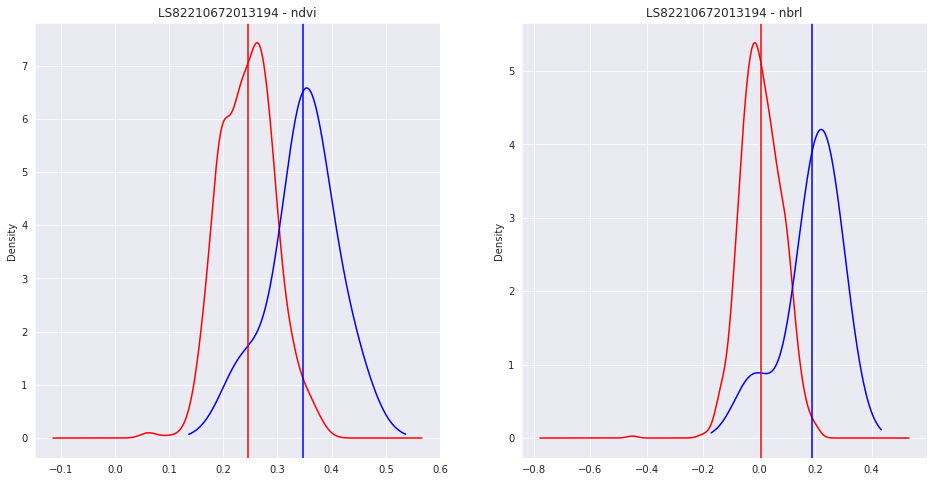

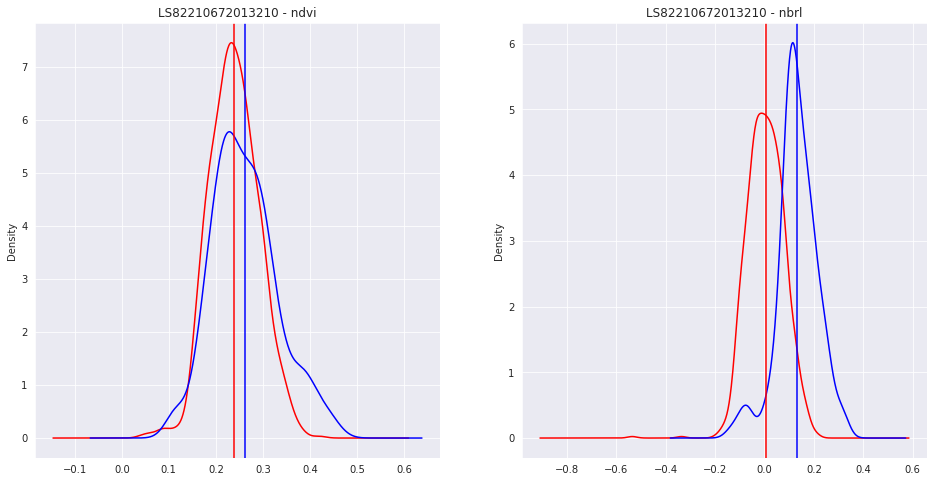

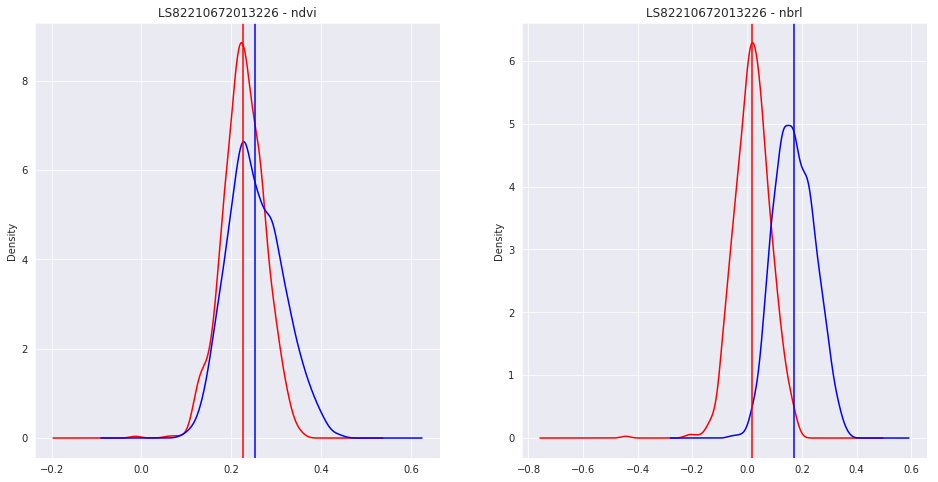

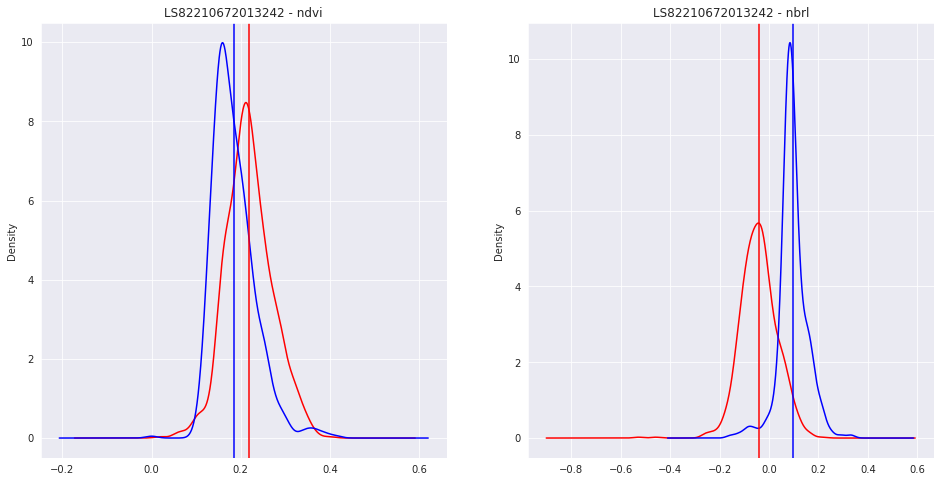

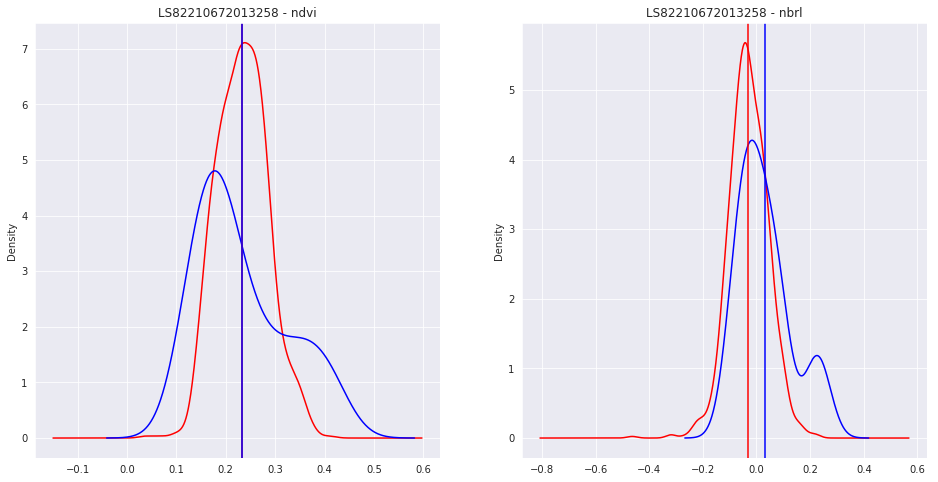

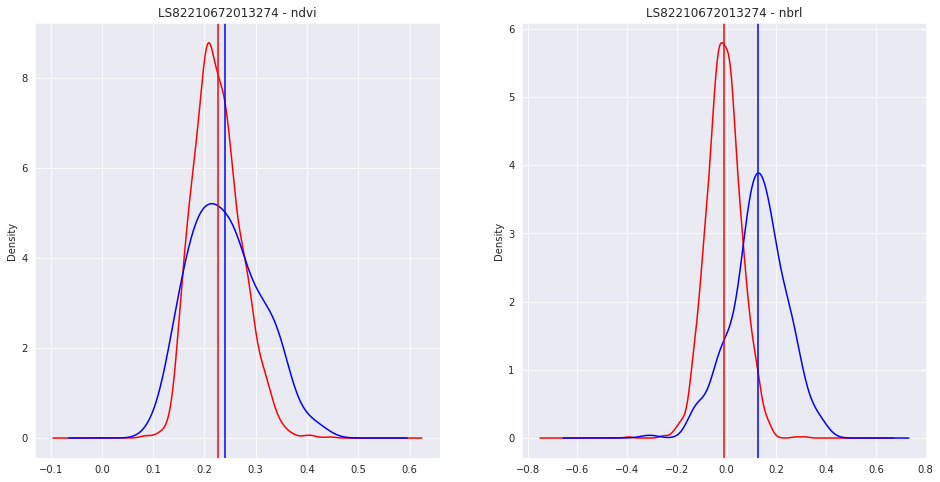

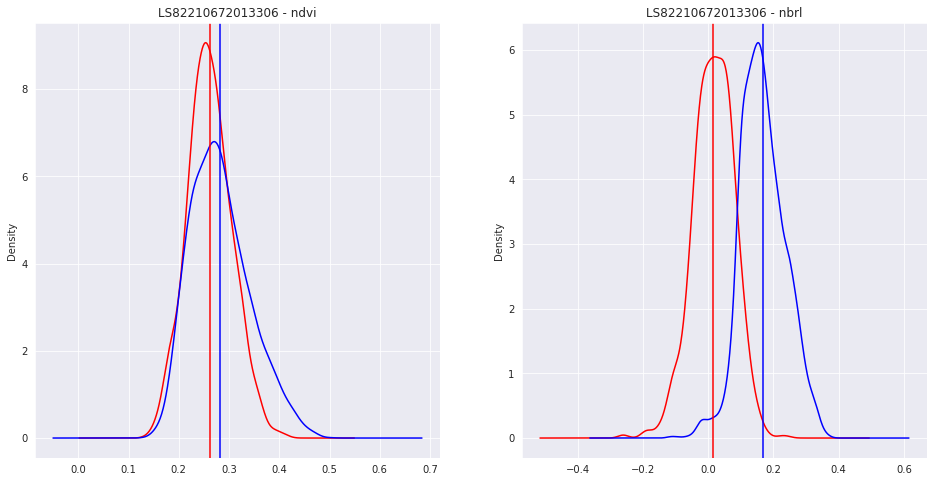

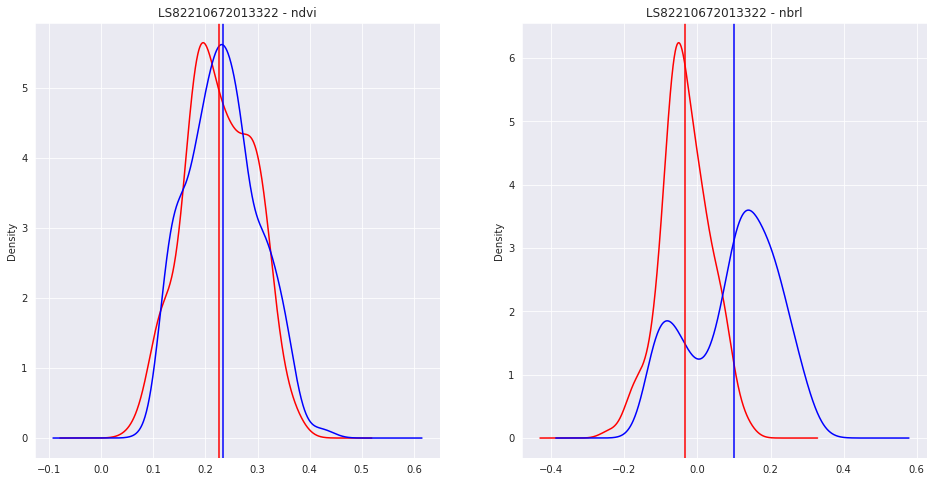

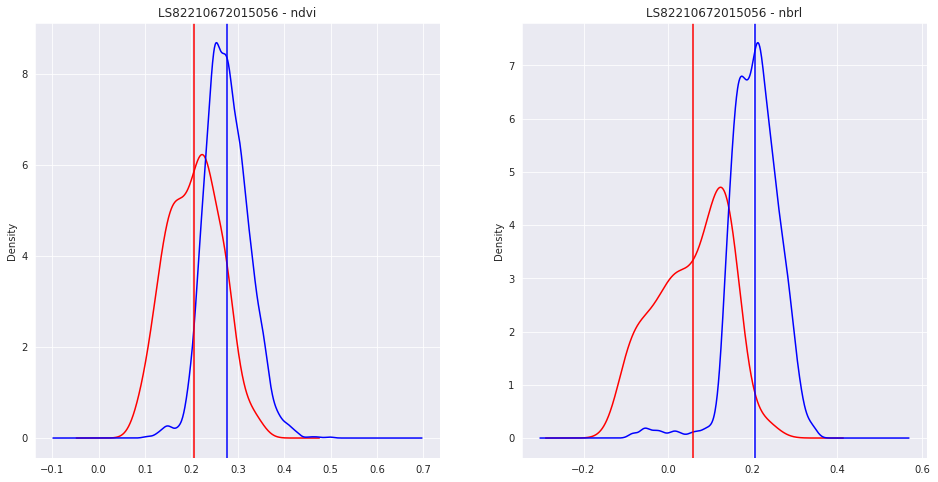

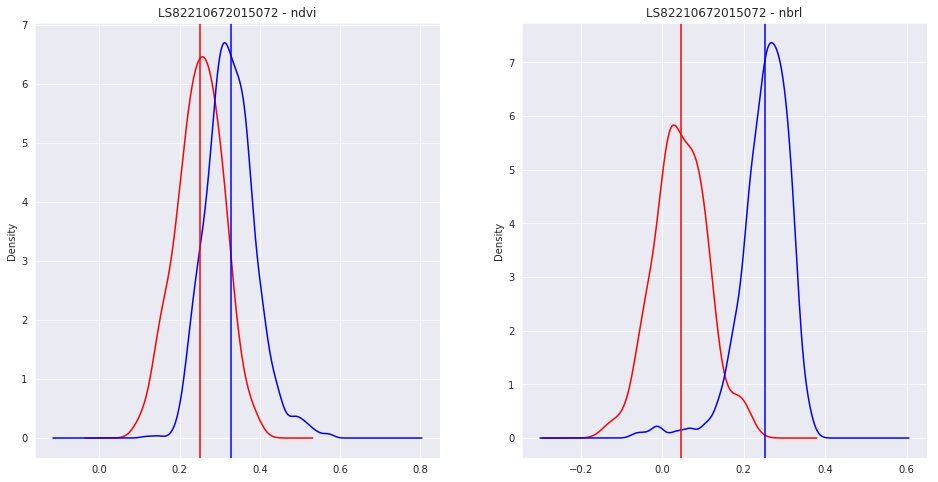

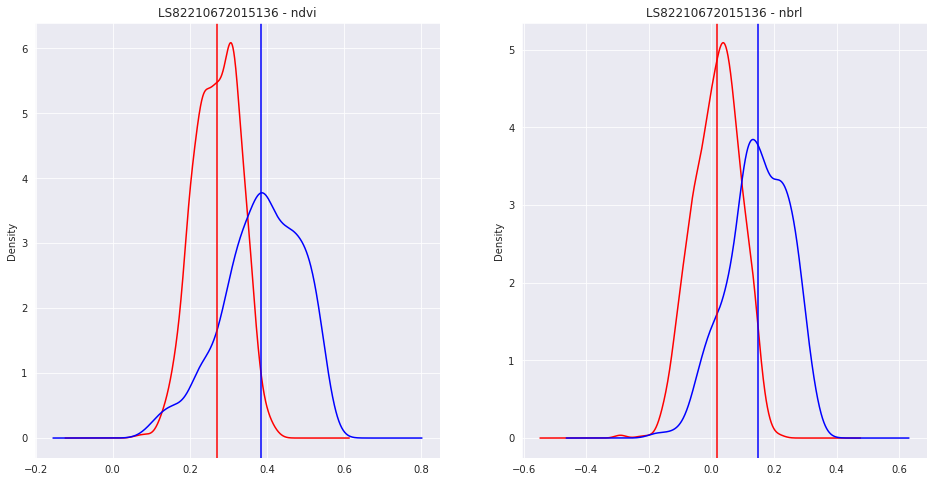

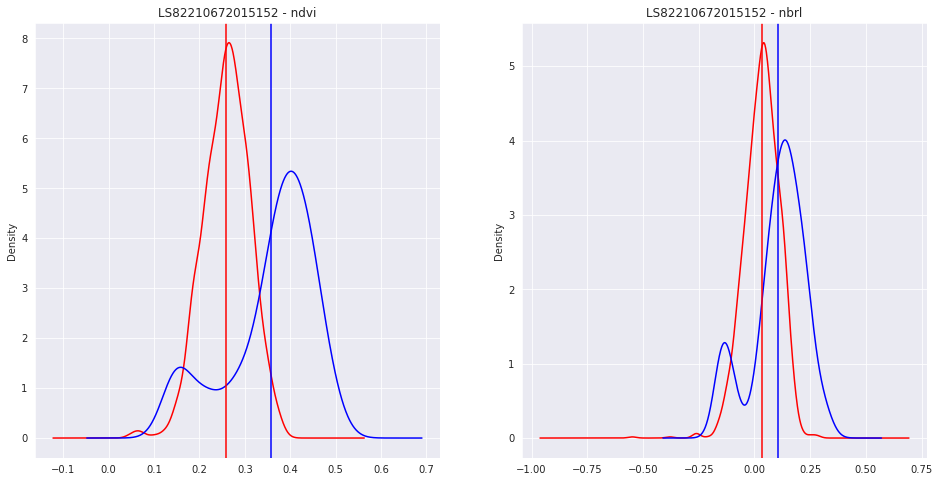

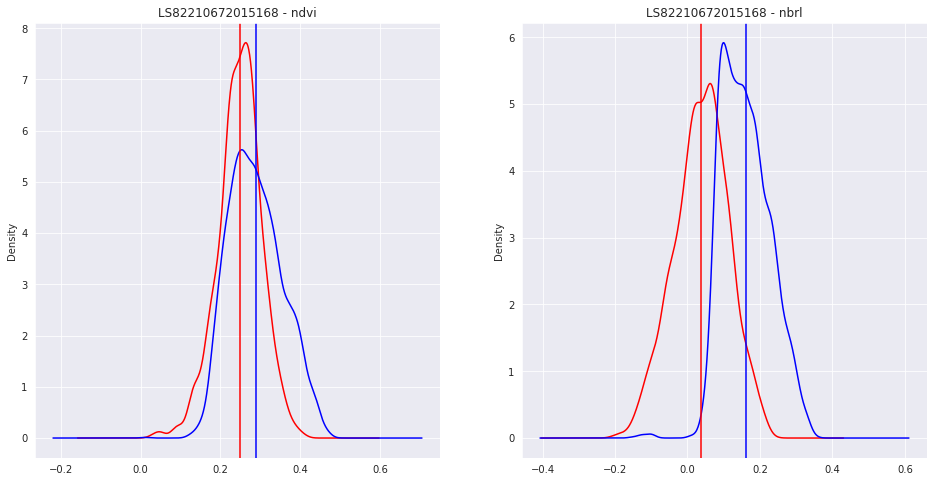

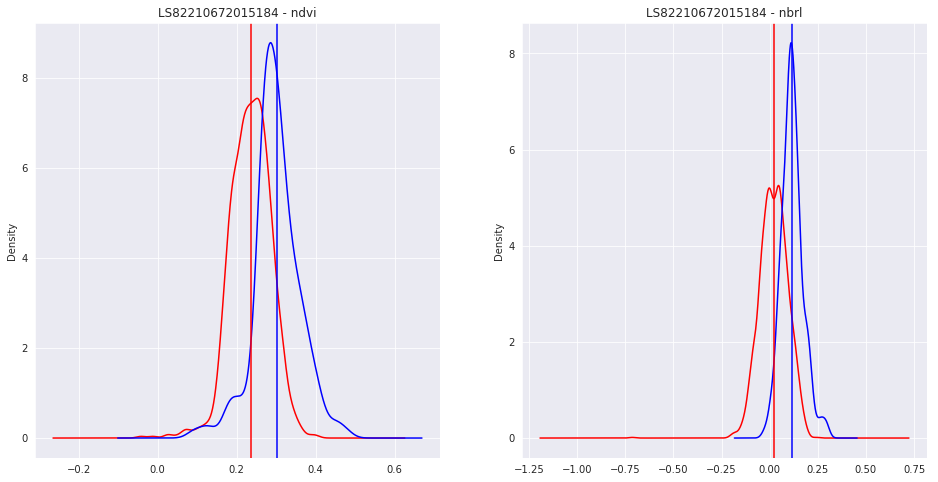

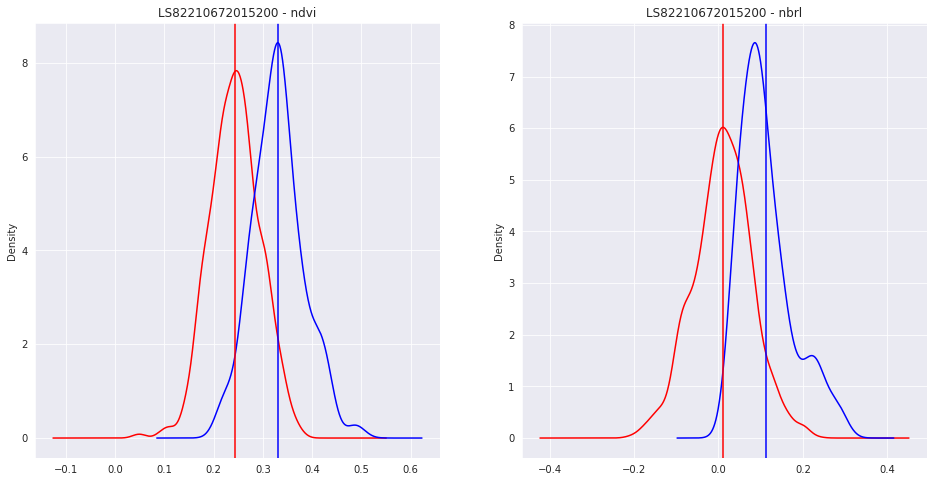

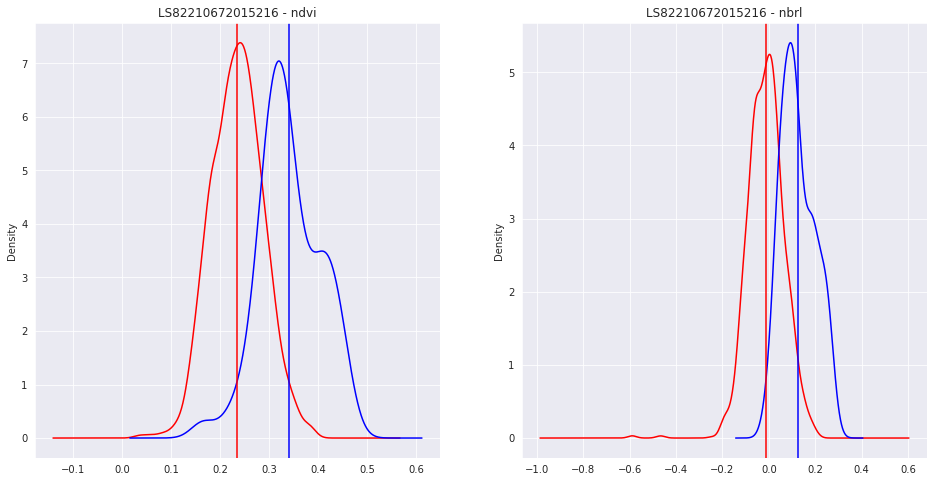

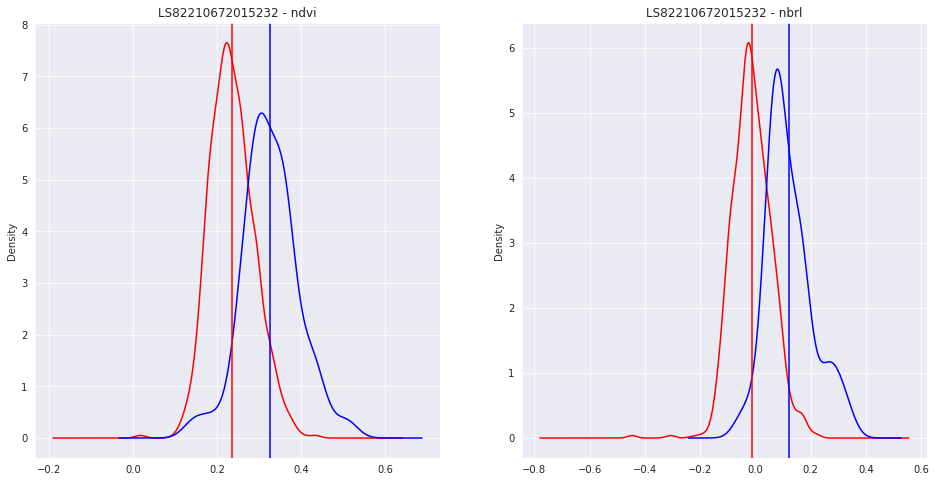

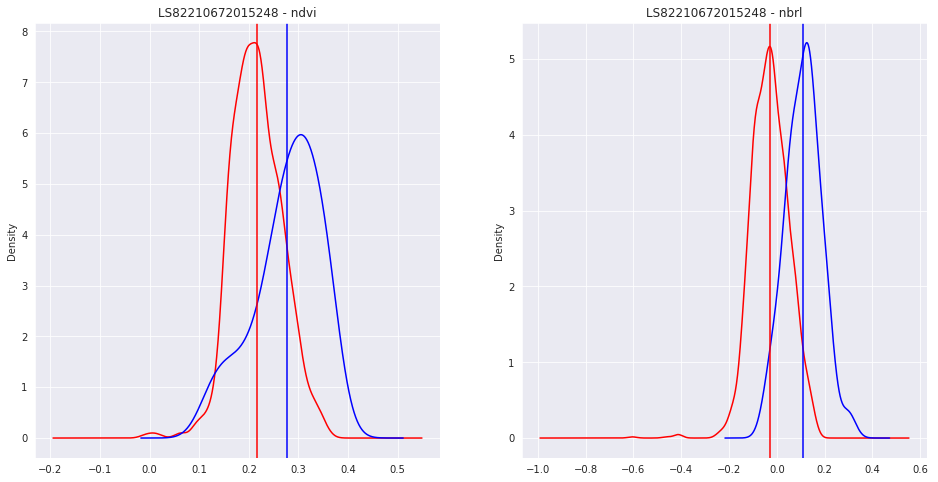

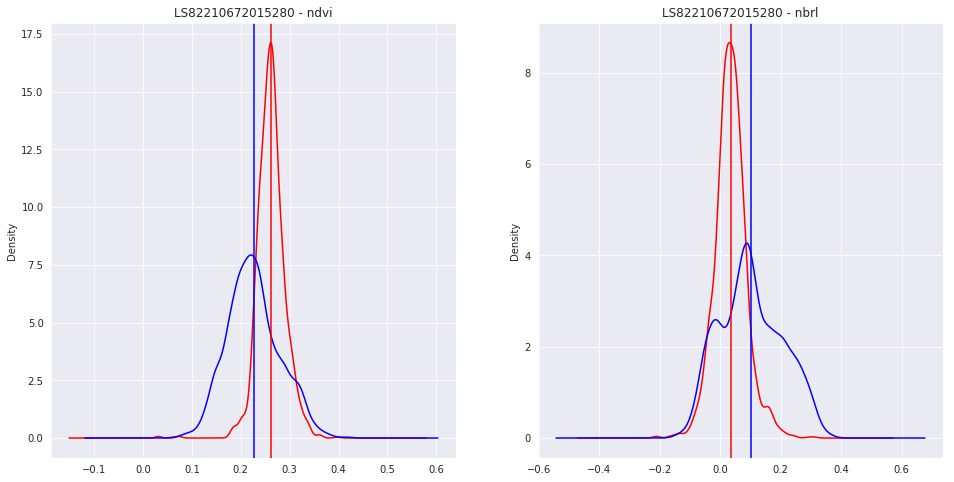

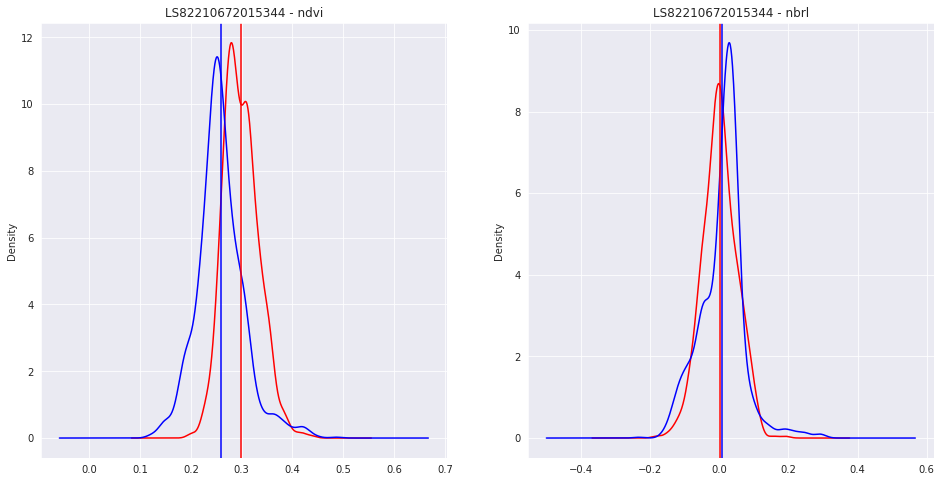

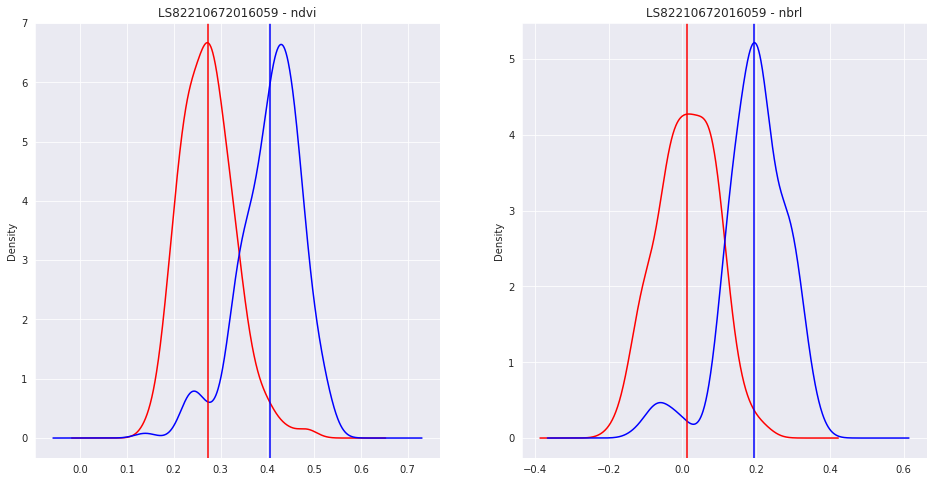

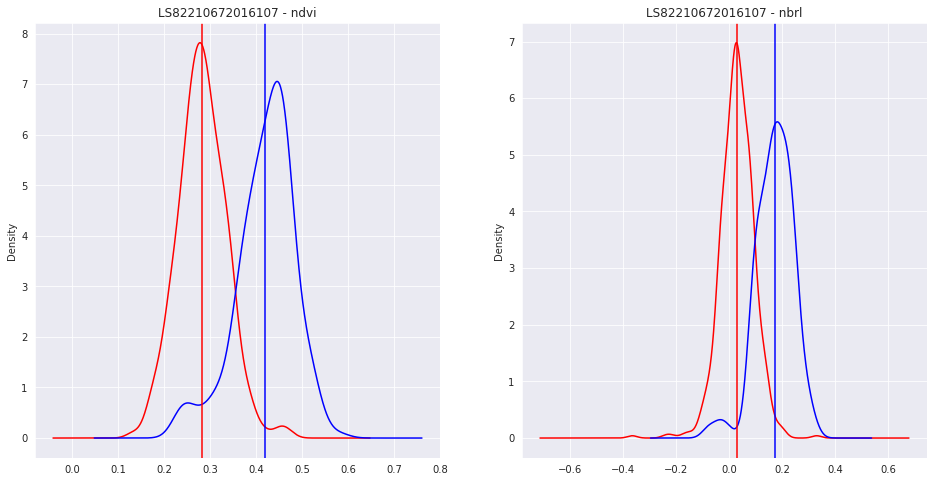

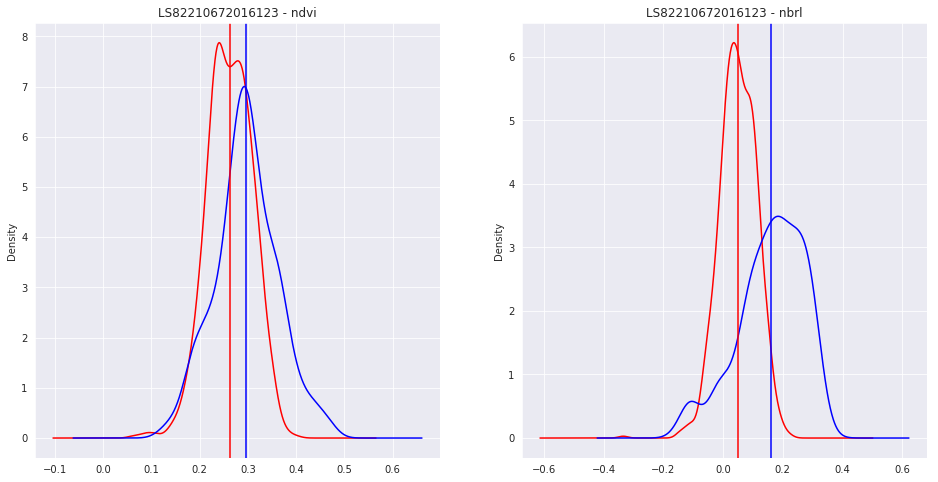

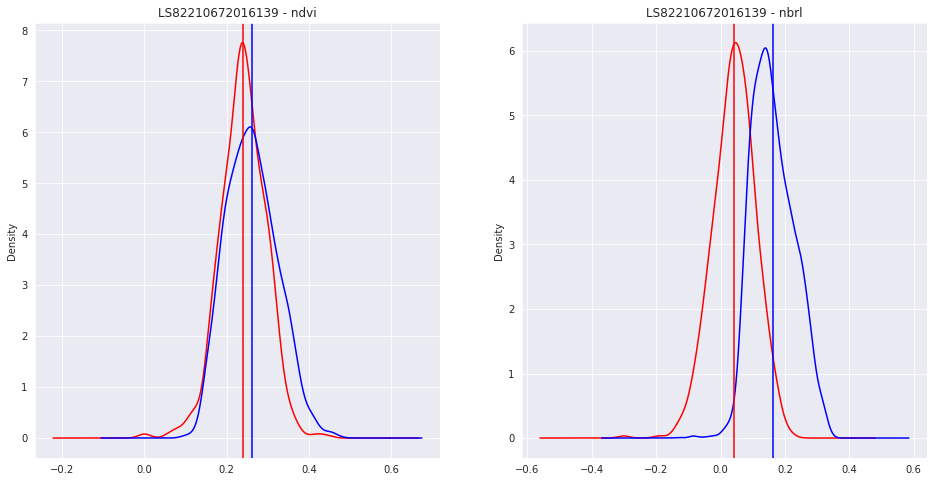

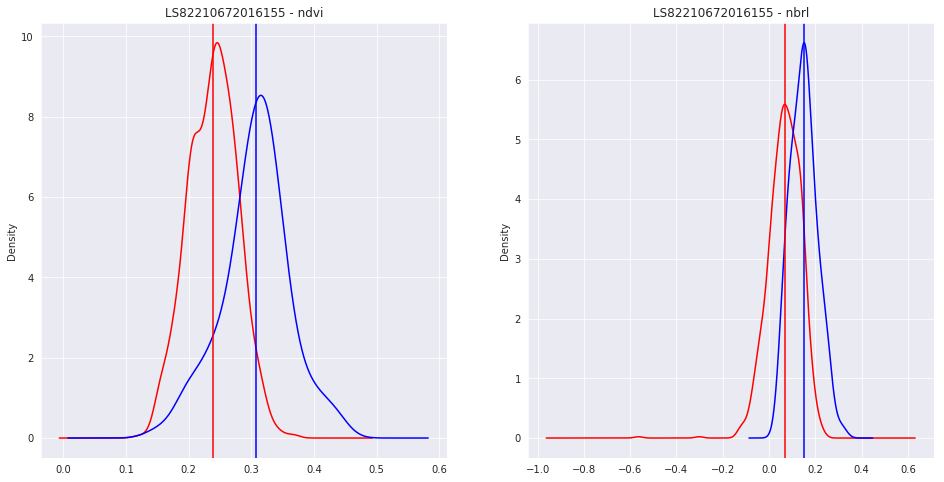

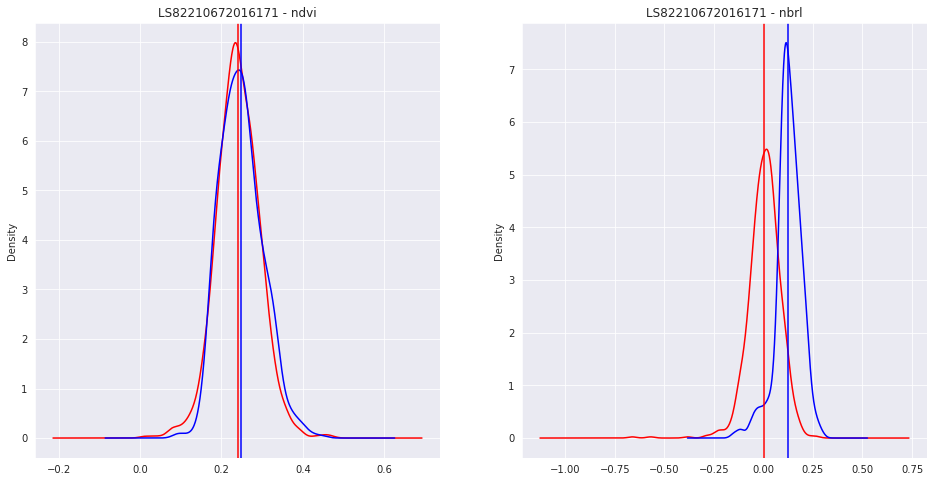

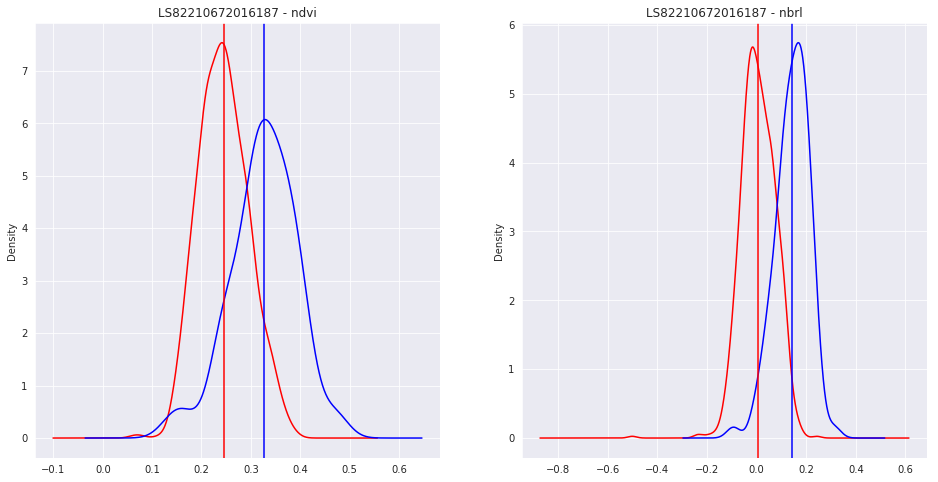

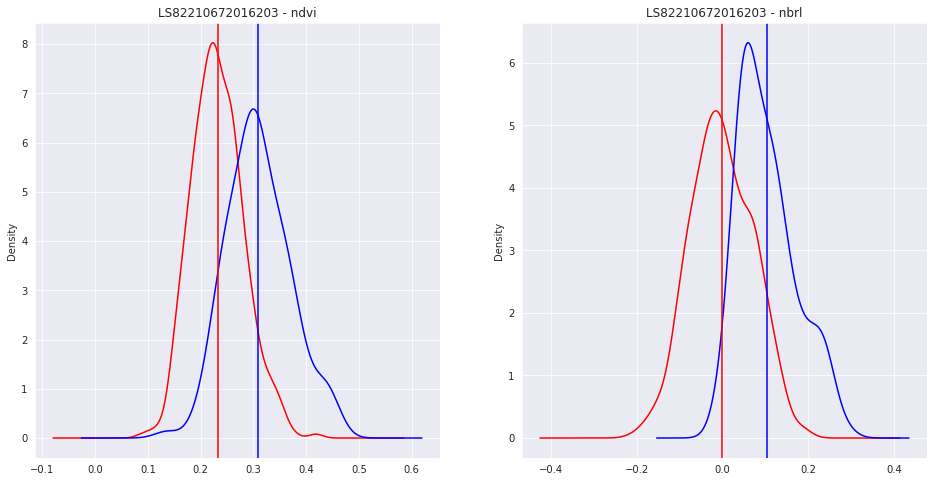

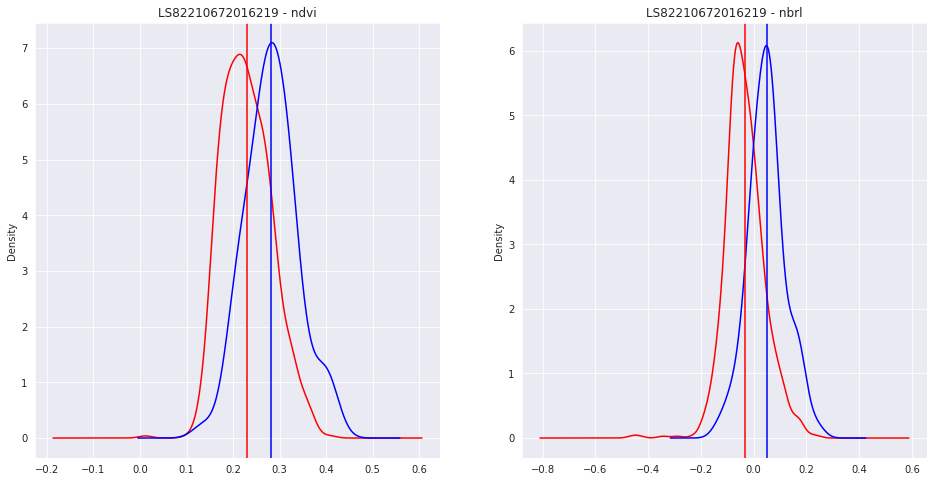

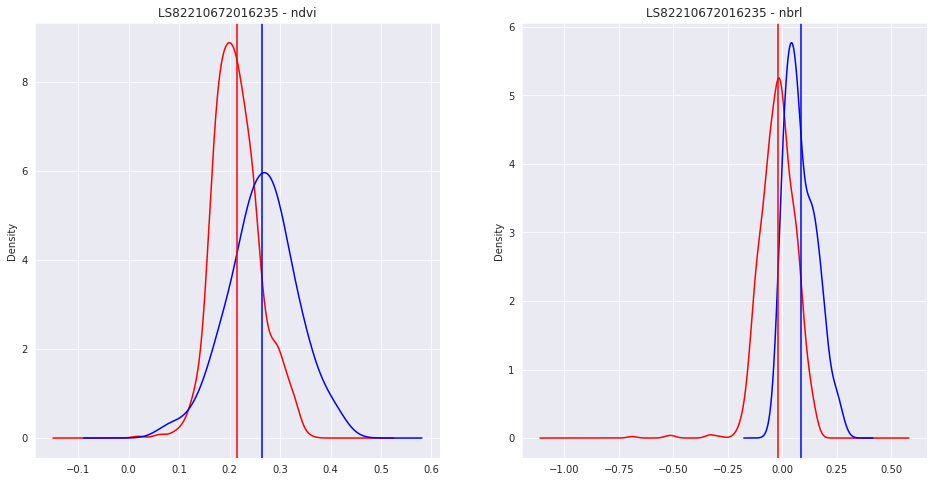

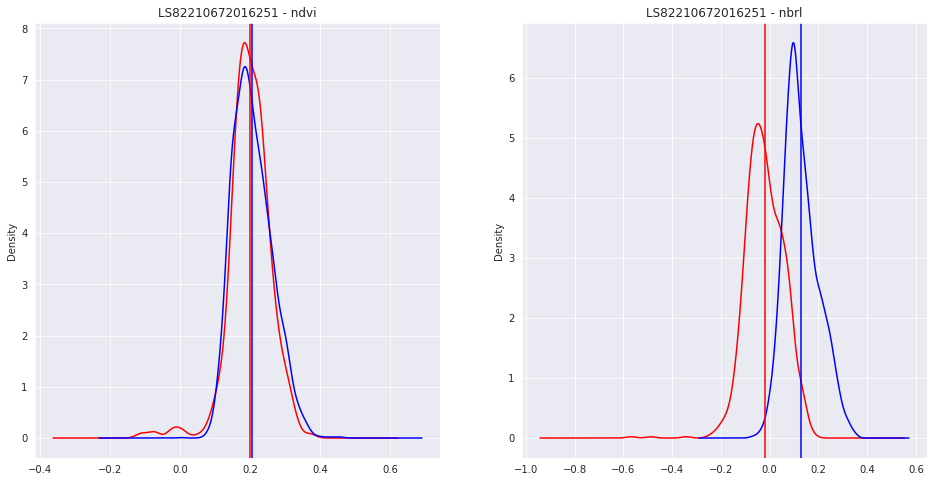

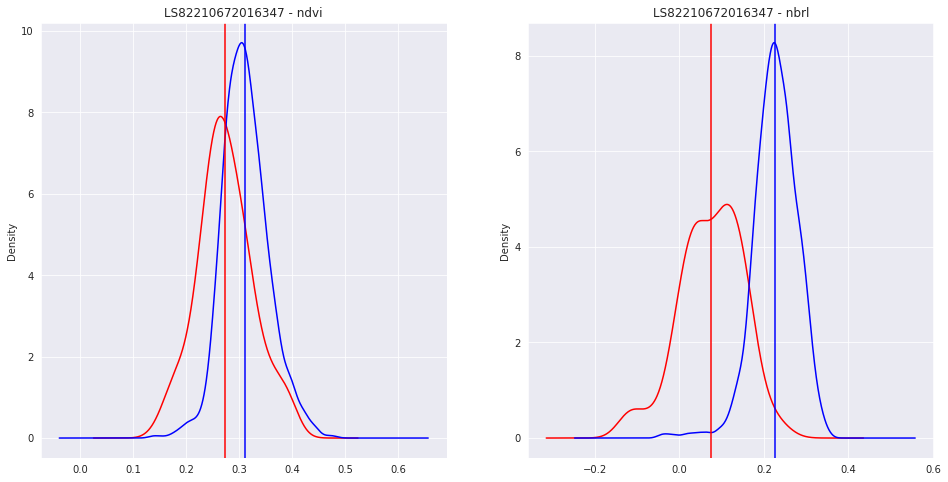

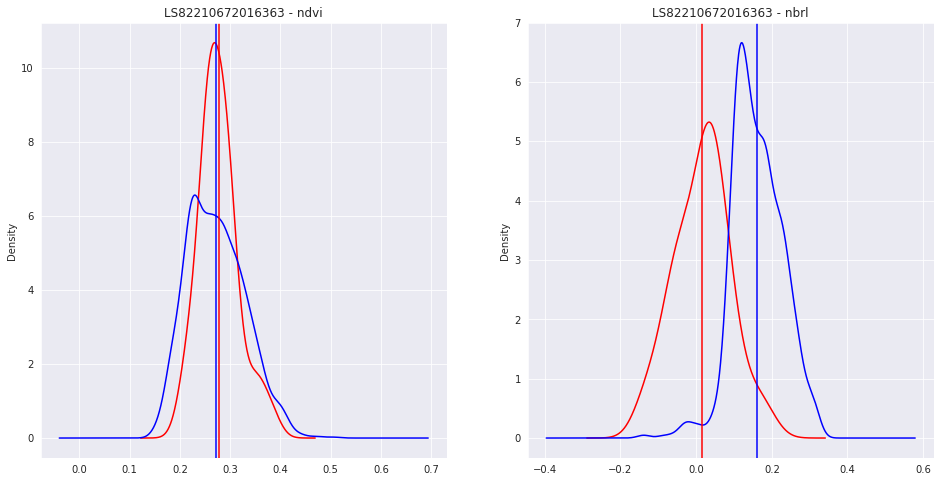

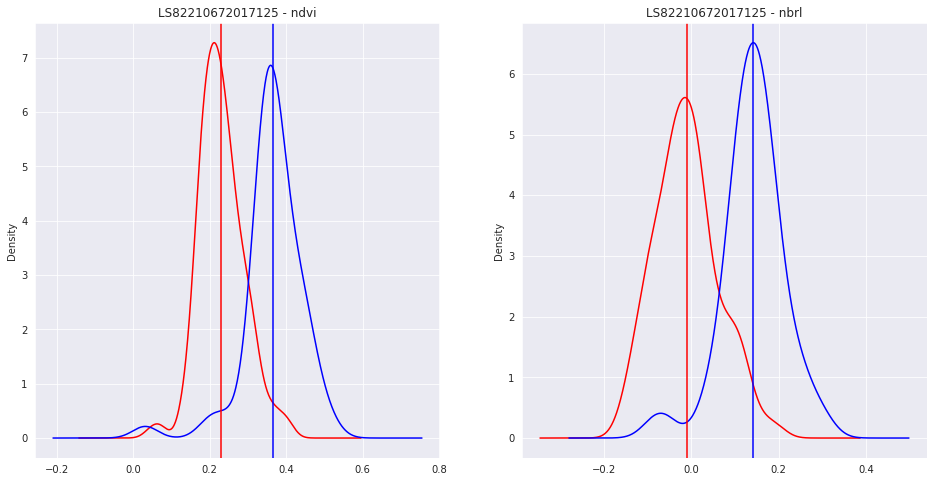

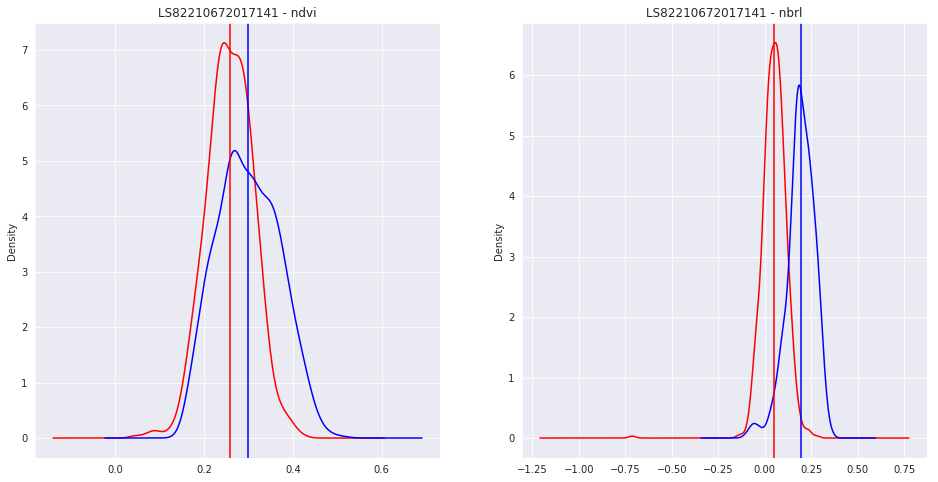

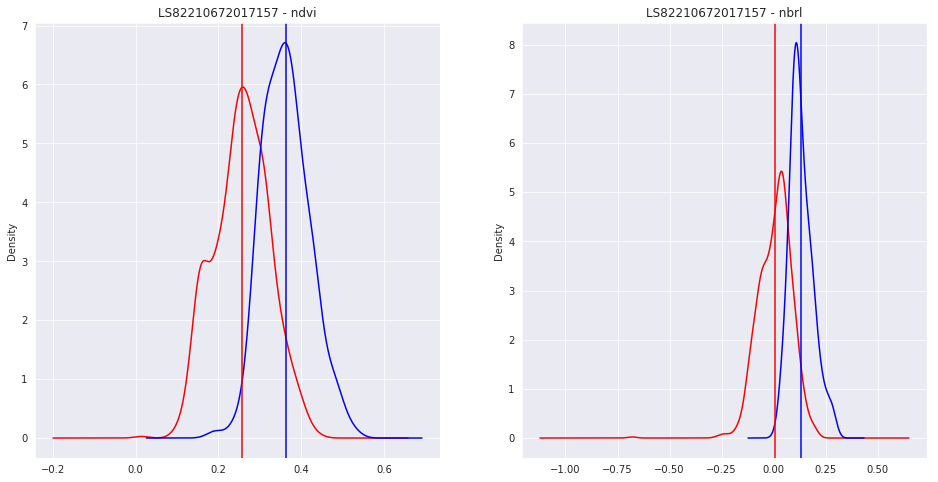

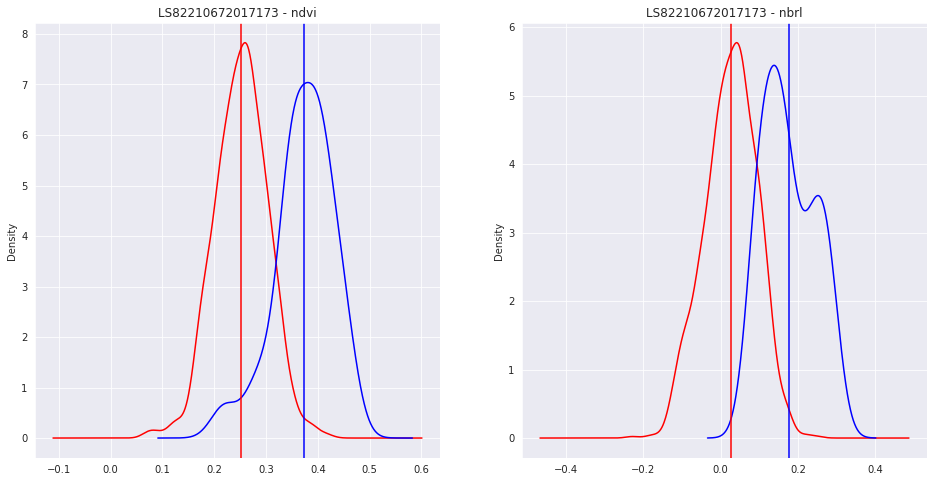

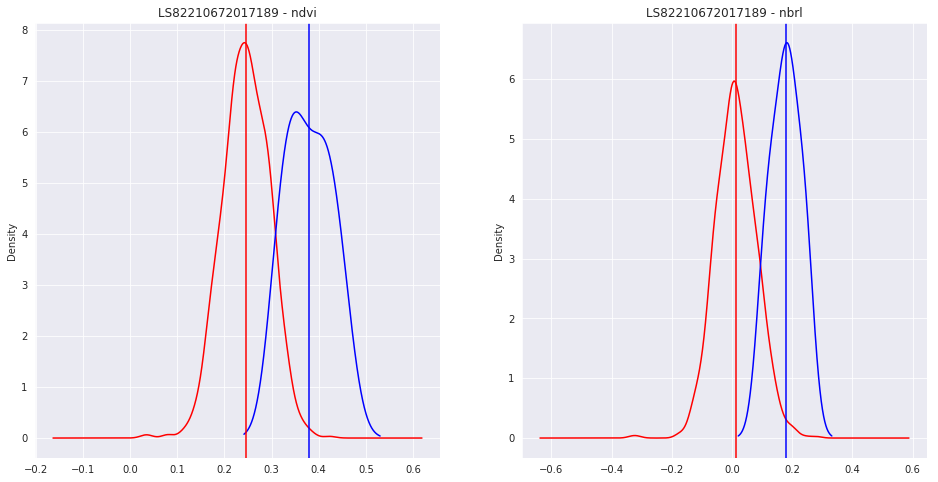

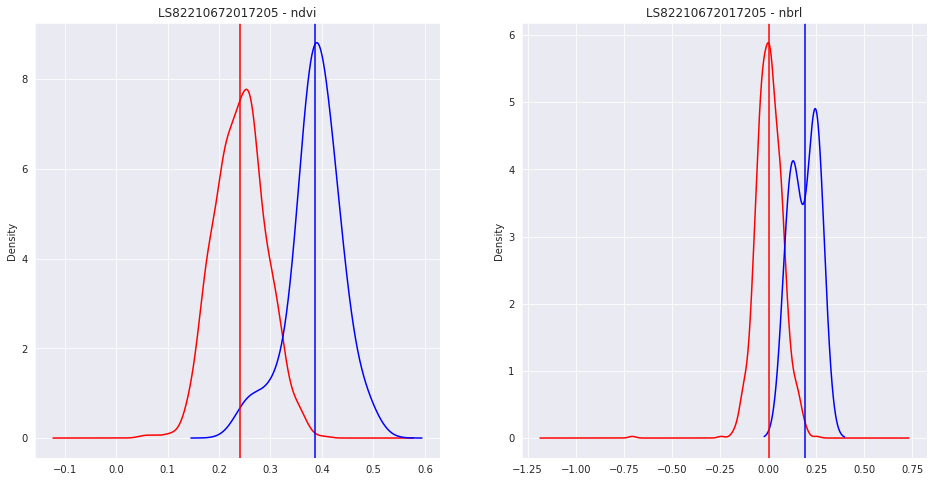

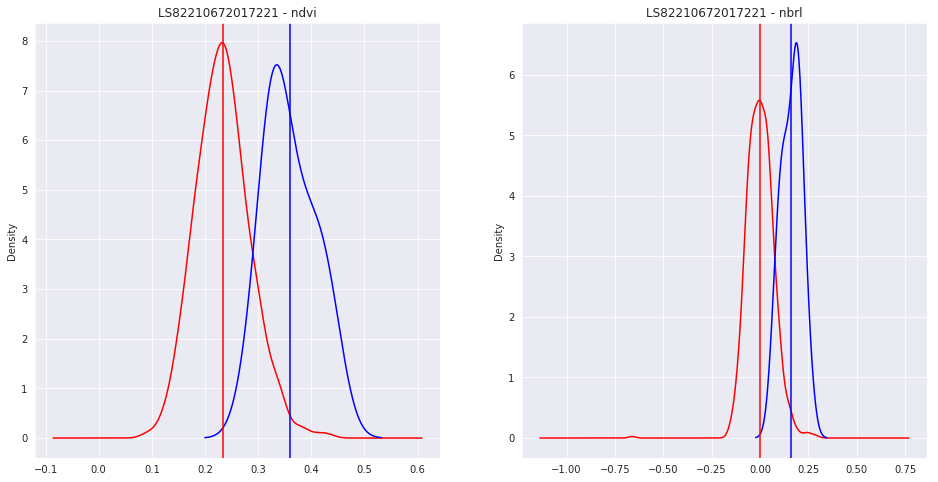

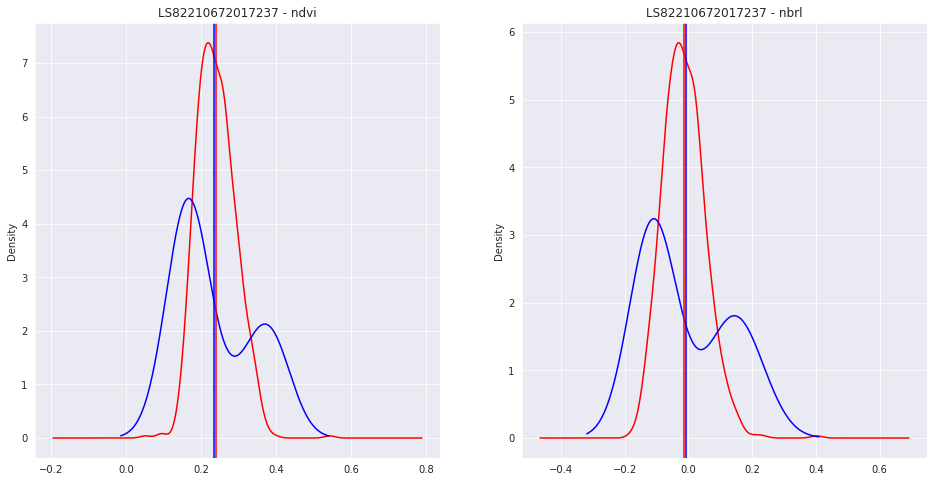

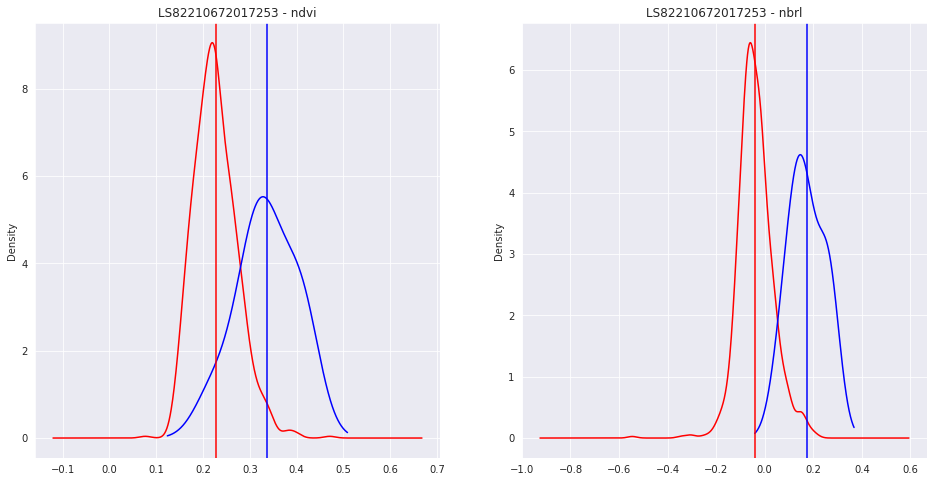

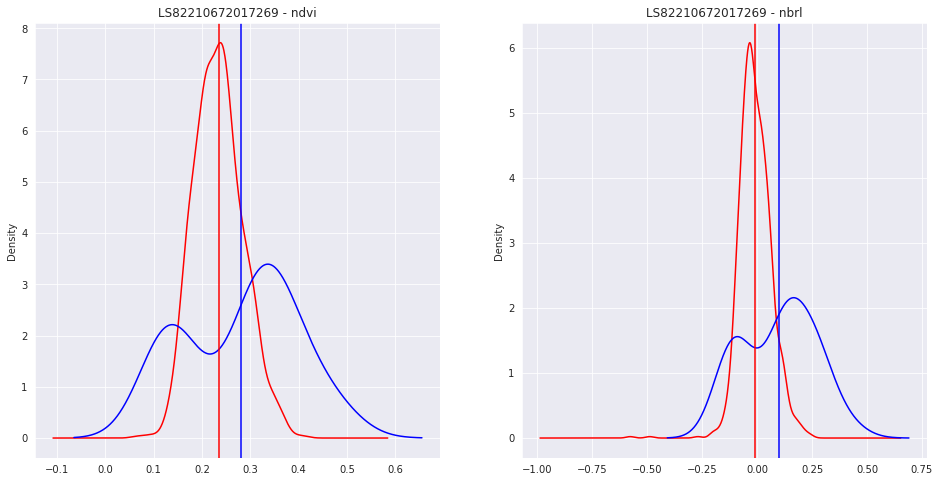

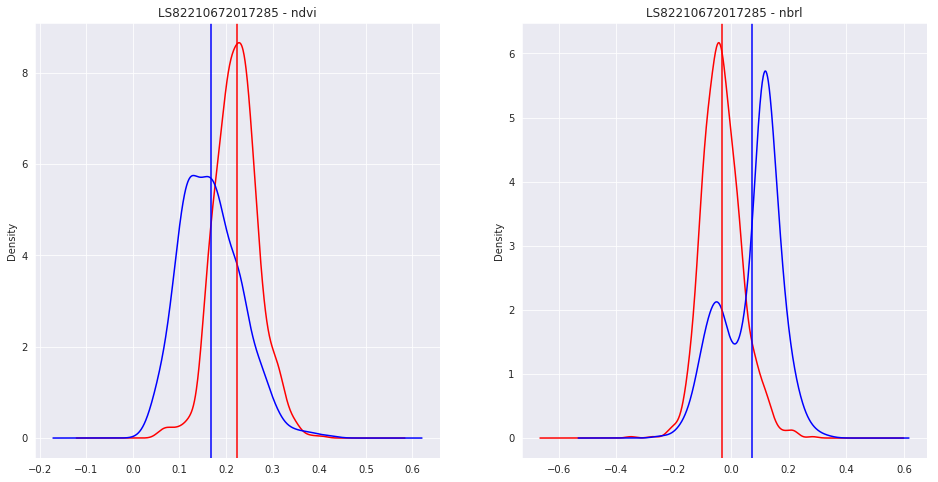

In [13]:
for i in id_cenas:
    fig, ax = plt.subplots(figsize=(16,8))
    d = df[df.id_cena==i].copy()
    d1 = d[d.verifica==1]
    d3 = d[d.verifica==3]
    
    col = 'ndvi'
    plt.subplot(1, 2, 1)
    plt.title('%s - %s' % (i, col))
    d1[col].plot.kde(c='r')
    d3[col].plot.kde(c='b')
    plt.axvline(d1[col].mean(), c='r')
    plt.axvline(d3[col].mean(), c='b')
    
    col = 'nbrl'
    plt.subplot(1, 2, 2)
    plt.title('%s - %s' % (i, col))
    d1[col].plot.kde(c='r')
    d3[col].plot.kde(c='b')
    plt.axvline(d1[col].mean(), c='r')
    plt.axvline(d3[col].mean(), c='b')

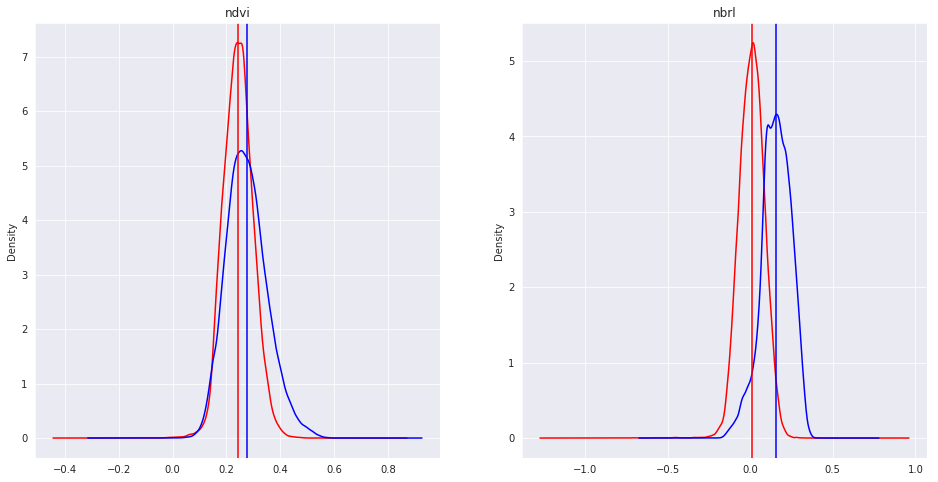

In [14]:
fig, ax = plt.subplots(figsize=(16,8))
d = df[df.id_cena.isin(id_cenas)]
d1 = d[d.verifica==1]
d3 = d[d.verifica==3]

col = 'ndvi'
plt.subplot(1, 2, 1)
plt.title(col)
d1[col].plot.kde(c='r')
d3[col].plot.kde(c='b')
plt.axvline(d1[col].mean(), c='r')
plt.axvline(d3[col].mean(), c='b')

col = 'nbrl'
plt.subplot(1, 2, 2)
plt.title(col)
d1[col].plot.kde(c='r')
d3[col].plot.kde(c='b')
plt.axvline(d1[col].mean(), c='r')
plt.axvline(d3[col].mean(), c='b')

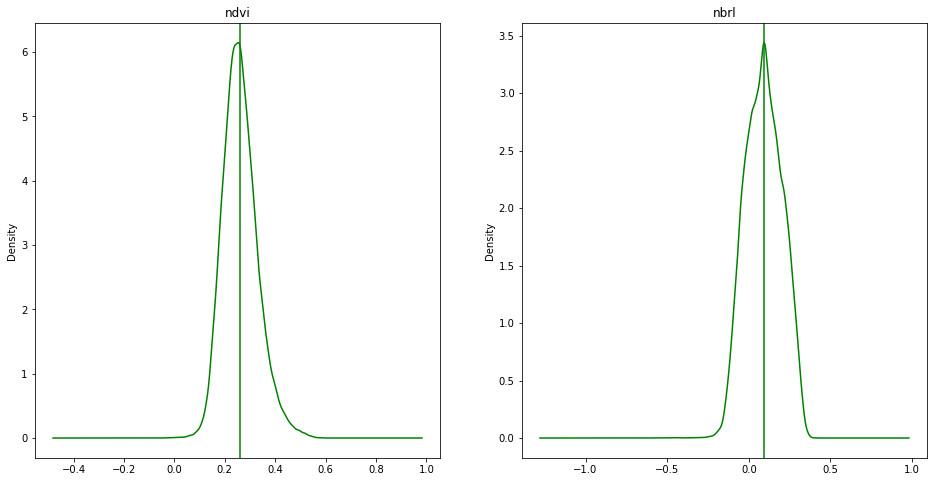

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
d = df[df.id_cena.isin(id_cenas)]

col = 'ndvi'
plt.subplot(1, 2, 1)
plt.title(col)
d[col].plot.kde(c='g')
plt.axvline(d[col].mean(), c='g')

col = 'nbrl'
plt.subplot(1, 2, 2)
plt.title(col)
d[col].plot.kde(c='g')
plt.axvline(d[col].mean(), c='g')

In [10]:
modelo = df[df.id_cena.isin(id_cenas)]

In [11]:
print(len(modelo))

97062


In [12]:
print(modelo.id_cena.value_counts())

LS82210672015280    8535
LS82210672015168    7594
LS82210672013306    6231
LS82210672016251    4863
LS82210672016139    4835
LS82210672015056    4724
LS82210672013226    4112
LS82210672013162    3840
LS82210672016347    3203
LS82210672015072    3112
LS82210672016363    2603
LS82210672015184    2322
LS82210672015344    2145
LS82210672015136    2075
LS82210672013274    1838
LS82210672017141    1810
LS82210672015152    1763
LS82210672017285    1674
LS82210672016171    1642
LS82210672015200    1621
LS82210672013242    1611
LS82210672015216    1571
LS82210672015248    1520
LS82210672016123    1410
LS82210672015232    1327
LS82210672013210    1262
LS82210672013178    1178
LS82210672017173    1167
LS82210672016155    1163
LS82210672017157    1052
LS82210672017269    1047
LS82210672016187    1007
LS82210672017189    1006
LS82210672016235     981
LS82210672013258     977
LS82210672017205     930
LS82210672016203     916
LS82210672017221     898
LS82210672017253     848
LS82210672016219     815


In [13]:
id_cena = 'LS82210672017141'

## Remove cena selecionada do conhecimento

In [14]:
modelo = modelo[(modelo.id_cena!=id_cena)]

In [15]:
print(len(modelo))

95252


## Pega dados para classificar

In [16]:
# Dado que será classificado
teste = df[df.id_cena==id_cena].copy().reset_index(drop=True)

In [17]:
print(len(teste))

1810


In [18]:
print(teste.verifica.value_counts())

3    1091
1     719
Name: verifica, dtype: int64


## Escolhe colunas usandas nos classificadores

In [19]:
colunas = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3', 'medianb4', 'medianb5', 'medianb6', 'medianb7']

## Cria classificador com Random Forest

In [20]:
classificador = RandomForestClassifier(n_jobs=8, n_estimators=100, max_features=len(colunas), random_state=0, max_depth=3, min_samples_split=5)
classificador.fit(modelo[colunas], modelo.verifica)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=8,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Coeficiente GINI
GINI é um indice para definir a desigualdade, criado por um italiano estatistico, variando o valor de 0 a 1, onde:


    - Próximo de 0: Igualdade
    - Próximo de 1: Desigualdade

Para diferenciar dado de AREA_QUEIMADA e de NAO_AREA_QUEIMADA, é mais importante que ocorra a DESIGUALDADE, para que possa ter diferença significativa entre si dentro do mesmo conjunto de dado.

In [21]:
rank = pd.DataFrame(sorted(list(zip(colunas,classificador.feature_importances_)), key=lambda x: x[1], reverse=True), columns=['coluna', 'gini'])
rank

coluna      gini
0   medianb5  0.737022
1       nbrl  0.237386
2   medianb2  0.024019
3   dif_ndvi  0.001121
4   medianb3  0.000452
5       ndvi  0.000000
6  dif_dnbrl  0.000000
7   medianb4  0.000000
8   medianb6  0.000000
9   medianb7  0.000000

In [22]:
## Classifica usando usanfo Random Forest e usando todas colunas

In [23]:
teste['rf'] = classificador.predict(teste[colunas])

## Verifica resultado da classificação

In [24]:
def ver_resultado(dado, coluna_previsao, coluna_verdade):
    try:
        quantidade_acerto_verifica_1 = len(dado[(dado[coluna_previsao]==1) & (dado[coluna_verdade]==1)])
        total_veirifica1 = len(dado[dado[coluna_verdade]==1])
        porcentagem = int((quantidade_acerto_verifica_1*100)/total_veirifica1)
        resultado = pd.DataFrame(data=[
            [len(dado), total_veirifica1, quantidade_acerto_verifica_1, porcentagem]
        ],
            columns=['total_features', 'total_verifica_1', 'acertos_verifica_1', 'porcentagem_acerto']
        )
        return resultado
    except Exception as e:
        print(e)
        return e
        return [0, 0, 0]

In [25]:
ver_resultado(teste, 'rf', 'verifica')

total_features  total_verifica_1  acertos_verifica_1  porcentagem_acerto
0            1810               719                 677                  94

## Testando com um modelo gerado com uma amostra de verifica 1 e 3 em mesma quantidade

In [26]:
modelo = df[df.id_cena.isin(id_cenas)] # Modelo com todas cenas da mesma orb_pto
modelo = modelo[(modelo.id_cena!=id_cena)] # Remove a cena atual do conhecimento

modelo_inteiro_1 = modelo[modelo.verifica==1]
modelo_inteiro_3_full = modelo[modelo.verifica==3]

if len(modelo_inteiro_3_full) > len(modelo_inteiro_1):
    id3 = np.random.choice(modelo_inteiro_3_full.id, len(modelo_inteiro_1), replace=False) 
    modelo_inteiro_3 = modelo_inteiro_3_full[modelo_inteiro_3_full.id.isin(id3)]
else:
    print('Existe mais verifica 1 do que 3')
    modelo_inteiro_3 = modelo_inteiro_3_full
    id1 = np.random.choice(modelo_inteiro_1.id, len(modelo_inteiro_3), replace=False) 
    modelo_inteiro_1 = modelo_inteiro_1[modelo_inteiro_1.id.isin(id1)]

modelo = pd.concat([modelo_inteiro_1, modelo_inteiro_3]).reset_index(drop=True)

In [27]:
modelo.verifica.value_counts()

3    42089
1    42089
Name: verifica, dtype: int64

## Cria classificador com Random Forest

In [28]:
classificador = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=len(colunas), random_state=0, max_depth=3, min_samples_split=5)
classificador.fit(modelo[colunas], modelo.verifica)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

## Indice GINI

In [29]:
rank = pd.DataFrame(sorted(list(zip(colunas,classificador.feature_importances_)), key=lambda x: x[1], reverse=True), columns=['coluna', 'gini'])
rank

coluna      gini
0   medianb2  0.716854
1       nbrl  0.122547
2   medianb5  0.084111
3       ndvi  0.071179
4   medianb6  0.005129
5   dif_ndvi  0.000167
6   medianb3  0.000013
7  dif_dnbrl  0.000000
8   medianb4  0.000000
9   medianb7  0.000000

## Classifica com Random Forest

In [30]:
teste['rf'] = classificador.predict(teste[colunas])

## Verifica resultado da classificação

In [31]:
ver_resultado(teste, 'rf', 'verifica')

total_features  total_verifica_1  acertos_verifica_1  porcentagem_acerto
0            1810               719                 687                  95

## Testando com um modelo usando o trimestre histórico da orb_pto

In [32]:
orb_pto = '221_067'
modelo = df[df.orb_pto==orb_pto] # Modelo com todas cenas da mesma orb_pto
modelo = modelo[(modelo.id_cena!=id_cena)] # Remove a cena atual do conhecimento

In [33]:
classificador = RandomForestClassifier(n_jobs=-1, n_estimators=100, max_features=len(colunas), random_state=0, max_depth=3, min_samples_split=5)
classificador.fit(modelo[colunas], modelo.verifica)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
rank = pd.DataFrame(sorted(list(zip(colunas,classificador.feature_importances_)), key=lambda x: x[1], reverse=True), columns=['coluna', 'gini'])
rank

coluna      gini
0   medianb2  0.596928
1       nbrl  0.194765
2   medianb5  0.176041
3       ndvi  0.028509
4   medianb6  0.002011
5   dif_ndvi  0.001746
6  dif_dnbrl  0.000000
7   medianb3  0.000000
8   medianb4  0.000000
9   medianb7  0.000000

In [35]:
teste['rf'] = classificador.predict(teste[colunas])

In [36]:
ver_resultado(teste, 'rf', 'verifica')

total_features  total_verifica_1  acertos_verifica_1  porcentagem_acerto
0            1810               719                 676                  94

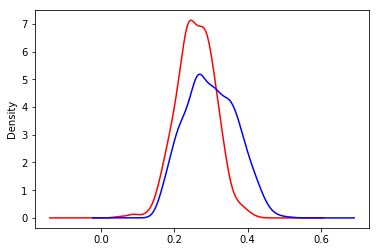

In [37]:
# teste.medianb2.plot.kde(c='b')
teste[teste.verifica==1].ndvi.plot.kde(c='r')
teste[teste.verifica==3].ndvi.plot.kde(c='b')
# teste.medianb7.plot.kde(c='g')

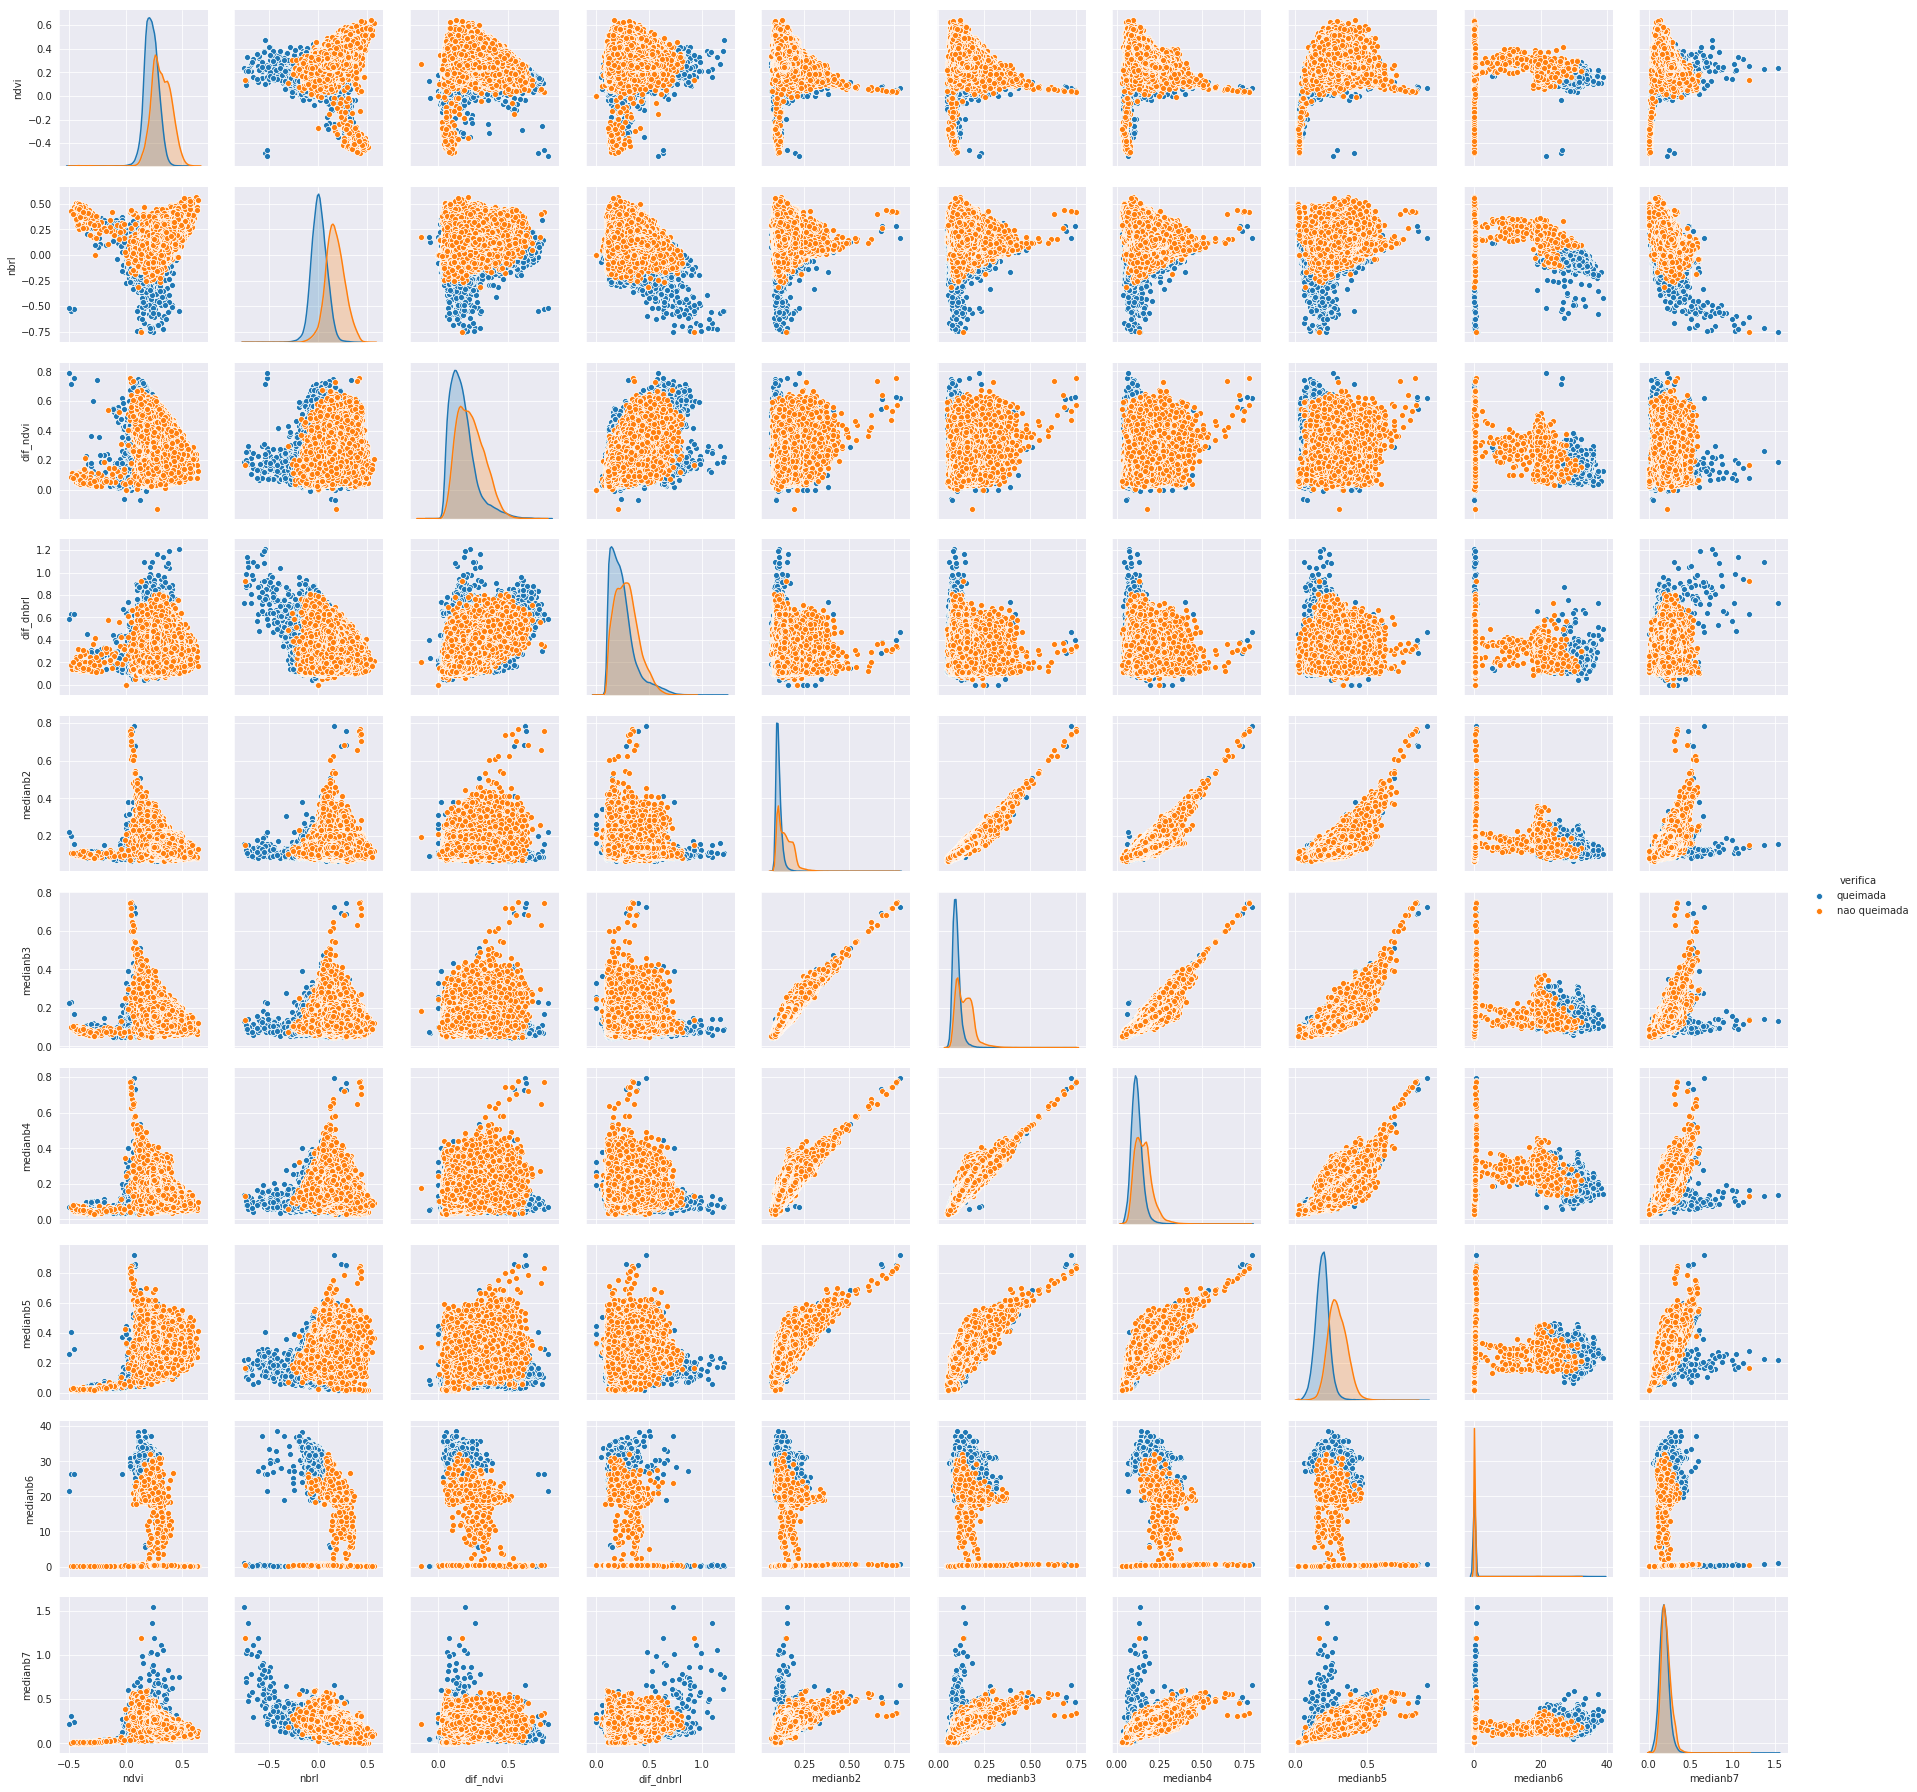

In [44]:
d = pd.concat([df1, df3_amostra])
d = d[colunas+['verifica']]
d['verifica'] = d['verifica'].apply(lambda x: 'queimada' if x==1 else 'nao queimada')
sns.pairplot(d, hue='verifica')

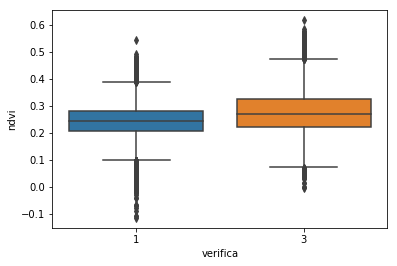

In [38]:
sns.boxplot(data=d,x='verifica', y='ndvi', )

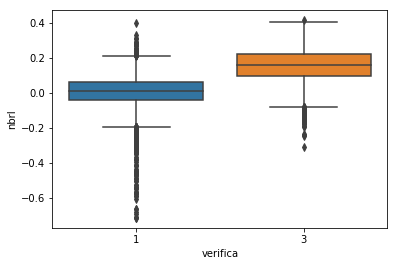

In [39]:
sns.boxplot(data=d,x='verifica', y='nbrl', )

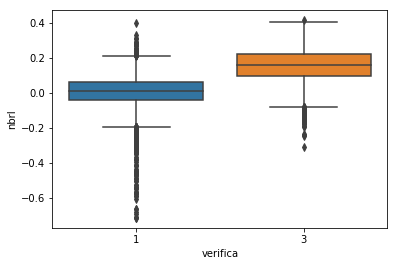

In [40]:
sns.boxplot(data=d,x='verifica', y='nbrl', )

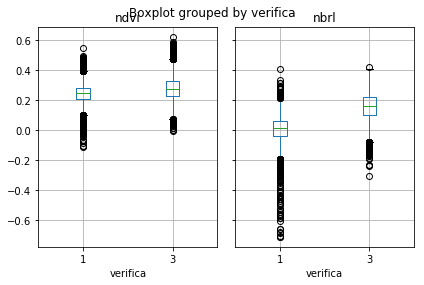

In [41]:
ax = d.boxplot(column=['ndvi', 'nbrl'], by='verifica',)
plt.tight_layout()

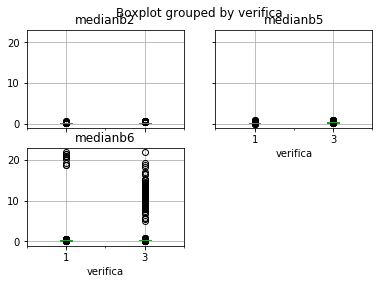

In [42]:
ax = d.boxplot(column=['medianb2', 'medianb5', 'medianb6'], by='verifica',)

In [43]:
correlacao = d[colunas].corr()

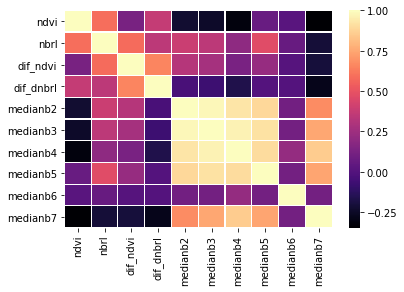

In [44]:
sns.heatmap(correlacao, cmap='magma', linecolor='white', linewidths=0.1)

/home/queimadas/.conda/envs/py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


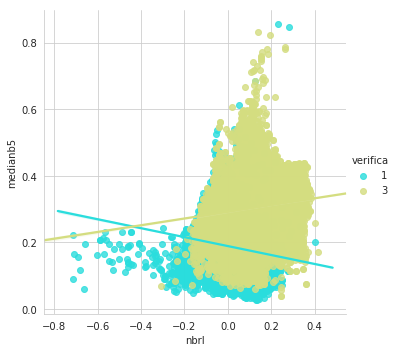

In [52]:
sns.lmplot(x='nbrl', y='medianb5', data=d, hue='verifica', palette='rainbow')